<a href="https://colab.research.google.com/github/jayesh-ingale/ML-Learning/blob/main/day05/hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [5]:
def evaluate_preds(y_true, y_preds):

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
    "precision": round(precision, 2),
    "recall": round(recall, 2),
    "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return metric_dict

In [6]:
evaluate_preds(y_test,y_preds)

Acc: 85.25%
Precision: 0.78
Recall: 0.97
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.78, 'recall': 0.97, 'f1': 0.86}

In [7]:
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_test,X_valid,y_test,y_valid=train_test_split(X_test,y_test,test_size=0.5)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds=clf.predict(X_valid)

In [8]:
baseline_metrics=evaluate_preds(y_valid,y_preds)

Acc: 84.78%
Precision: 0.91
Recall: 0.81
F1 score: 0.86


In [9]:
## RandomizedSearchCV for hyperparameter tuning

In [10]:
from sklearn.model_selection import RandomizedSearchCV
grid={
    "n_estimators":[10,100,200,500,1000,1200],
    "max_depth":[None,5,10,20,20],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6,8],
    "min_samples_leaf":[1,2,4]

}
clf=RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10,
    cv=5,
    verbose=2
)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [11]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [12]:
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.model_selection import RandomizedSearchCV
grid={
    "n_estimators":[10,100,200,500,1000,1200],
    "max_depth":[None,5,10,20,20],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6,8],
    "min_samples_leaf":[1,2,4]

}
clf=RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10,
    cv=5,
    verbose=2
)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [13]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [14]:
rs_y_preds=rs_clf.predict(X_test)

In [15]:
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc: 83.61%
Precision: 0.87
Recall: 0.81
F1 score: 0.84


In [16]:
param_grid={
    "n_estimators":[10,50,100],
    "min_samples_split":[4,6,2],
    "min_samples_leaf":[2,4],
    "max_features":["sqrt"],
    "max_depth":[None,5],
}

In [18]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=-1)
gs_clf=GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    verbose=2
)
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_esti

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [4, 6, 2],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [19]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 10}

In [20]:
gs_y_preds=gs_clf.predict(X_test)

In [21]:
gs_evaluate=evaluate_preds(y_test,gs_y_preds)

Acc: 86.89%
Precision: 0.90
Recall: 0.84
F1 score: 0.87


<Axes: >

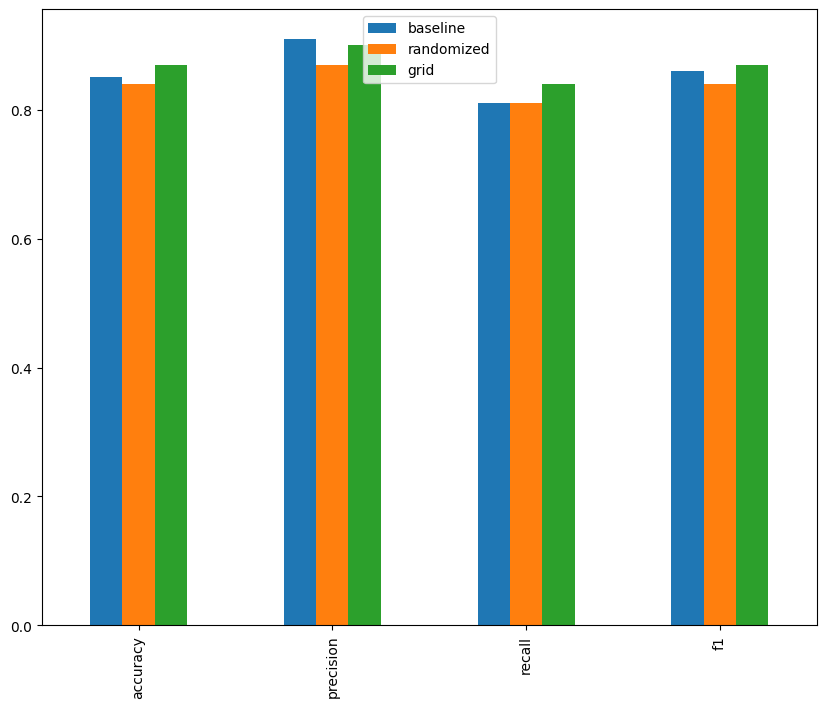

In [22]:
compare_metrics=pd.DataFrame(
    {"baseline":baseline_metrics,
     "randomized":rs_metrics,
     "grid":gs_evaluate
     }
)
compare_metrics.plot.bar(figsize=(10,8))
